# Data Science Analyzation on Used Car Sales 

This jupitor notebook contains all work done on 1st dataset.

The github repository link is: 

https://github.com/anummanzoor901/Datascience888.git

### Importing Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

### Analysing Dataset

In [62]:
df=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [63]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [64]:
df.shape

(4340, 8)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [66]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


##### Extract the requird data

I will extract data of "price, year, manufacturer, model, condition, transmission, type, paint_color, state, lat, long"
from this dataset.

In [69]:
#columns=[ "price", "year", "manufacturer", "model", "condition", "transmission", "type", "paint_color", "state", "lat", "long"]

In [70]:
#df = df[columns]






Checking if dataset contains null values

In [71]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### Imbalancing Data

To make my data imbalance I used random data creation method. 

website which I used to study about random sampling: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html



# A) Low imbalance (65%)

first I will generate 65% imbalanced data and visualize it. 

In [72]:
rows = df.sample(frac =.65)
rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
322,Chevrolet Tavera Neo 3 10 Seats BSIV,2007,160000,120000,Diesel,Individual,Manual,Third Owner
2384,Maruti Celerio VXI,2017,430000,93000,Petrol,Dealer,Manual,First Owner
2450,Maruti Ciaz 1.4 AT Zeta,2017,500000,40000,Petrol,Individual,Automatic,First Owner
1269,Ford Freestyle Titanium Diesel BSIV,2016,700000,29600,Diesel,Dealer,Manual,First Owner
2371,Renault Duster 85PS Diesel RxZ,2017,600000,90000,Diesel,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
3237,Maruti 800 Std,1998,40000,40000,Petrol,Individual,Manual,Fourth & Above Owner
2638,Maruti Wagon R LXI Minor,2007,160000,80000,Petrol,Individual,Manual,Second Owner
3011,Mahindra Bolero Power Plus SLX,2017,675000,70000,Diesel,Individual,Manual,First Owner
1540,Maruti Alto LXi BSIII,2008,180000,70000,Petrol,Individual,Manual,Third Owner


277472 rows are created randomly, and from the above display we can see that Nulls are randomly generated too. It created 65% random data. 

Next, I will combine and shuffle these randomly created rows with original dataset. 

In [73]:
df = pd.concat([df, rows])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3237,Maruti 800 Std,1998,40000,40000,Petrol,Individual,Manual,Fourth & Above Owner
2638,Maruti Wagon R LXI Minor,2007,160000,80000,Petrol,Individual,Manual,Second Owner
3011,Mahindra Bolero Power Plus SLX,2017,675000,70000,Diesel,Individual,Manual,First Owner
1540,Maruti Alto LXi BSIII,2008,180000,70000,Petrol,Individual,Manual,Third Owner


### Visualizing data

Vehicle purchase from 2000 to 2021

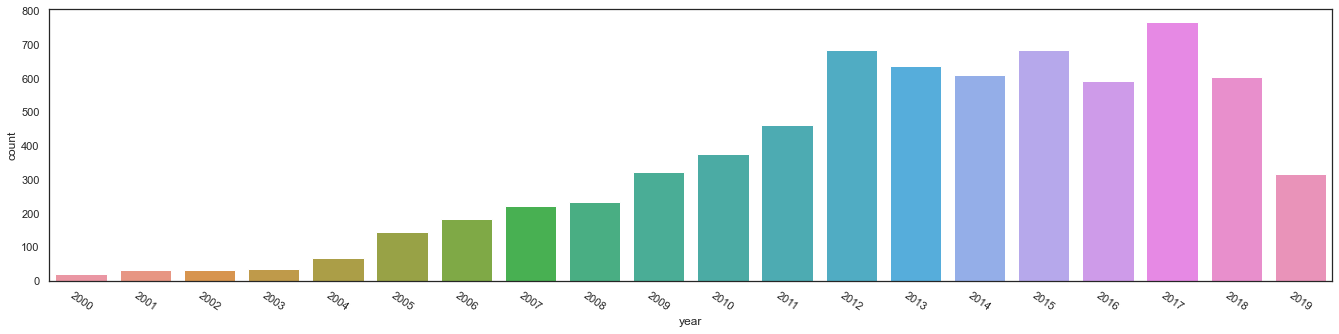

In [79]:
df_year = df[(df["year"]>1999) & (df["year"]<2020)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(23,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

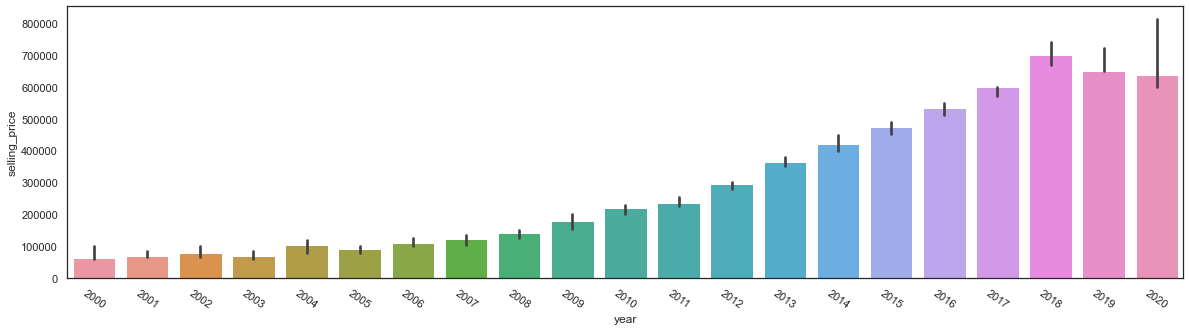

In [76]:
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.barplot(data= df_year,x="year", y= "selling_price",estimator=median)
plt.show()

We can know vehicle's price is increasing from median graph. Except for 2021, since the dataset was created in 2021, not all records are present. 

#### Manufacturer company records

to see which manufacturer is smallest to largest

/Users/Anum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sales data distribution')

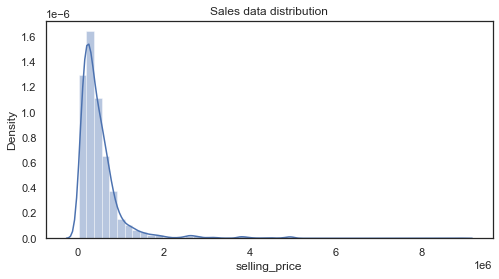

In [82]:
fig=plt.figure(figsize=(8,4))
sns.distplot(df['selling_price'])
plt.title('Sales data distribution')


#### Top 10 models comparing

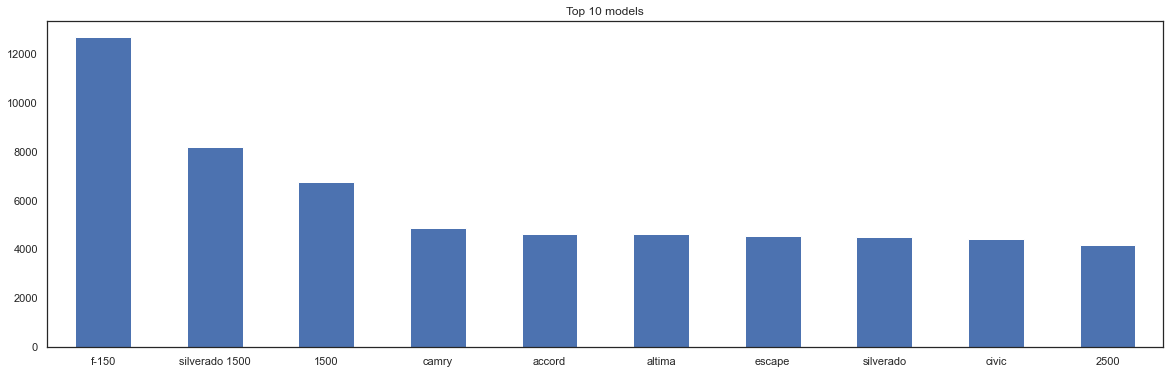

In [36]:
df_year['model'].value_counts().head(10).plot.bar(figsize=(20,6),rot=0, title="Top 10 models")
plt.show()

In [23]:
#### Best and more bought color

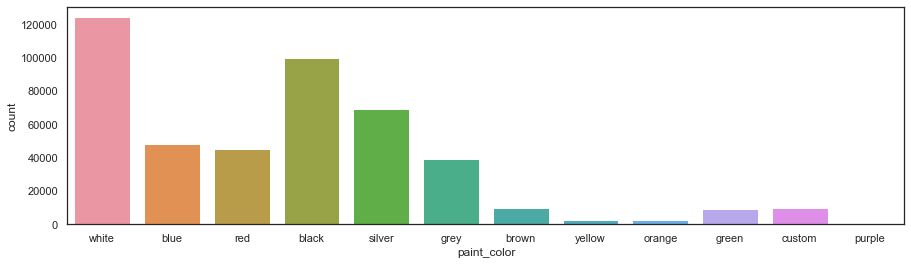

In [37]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_year,x="paint_color")
plt.show()

The most famous color is white, black and silver

#### Plotng heat map

Heat map to analyse data and their corelation with each other.

<AxesSubplot:>

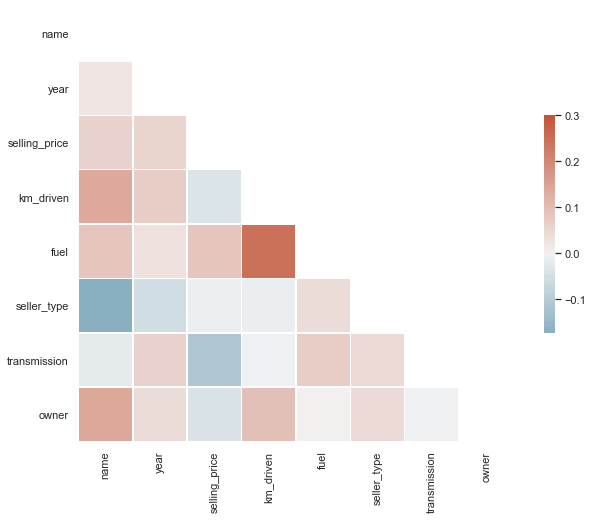

In [86]:
sns.set_theme(style="white")
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 8)),
                 columns=list(df))
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# A) Low imbalance (75%)

In [88]:

rows1 = df.sample(frac =.75)
rows1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1471,BMW X1 sDrive20d M Sport,2014,1485000,48000,Diesel,Dealer,Automatic,First Owner
2974,Maruti Zen Estilo LXI Green (CNG),2010,145000,68000,CNG,Individual,Manual,Second Owner
4165,Renault KWID RXT Optional,2016,300000,30000,Petrol,Individual,Manual,First Owner
53,Maruti Alto LXi,2006,100000,80000,Petrol,Individual,Manual,First Owner
1934,Mahindra Scorpio M2DI,2010,480000,90000,Diesel,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
1792,Maruti Wagon R LXI BS IV,2013,213000,80000,Petrol,Individual,Manual,First Owner
3069,Maruti Alto K10 VXI Airbag,2017,290000,60000,Petrol,Individual,Manual,First Owner
2900,Hyundai EON D Lite Plus,2012,204999,60000,Petrol,Dealer,Manual,Third Owner
4033,Hyundai Verna SX AT Diesel,2009,245000,75000,Diesel,Dealer,Automatic,First Owner


In [89]:
df1 = pd.concat([df, rows1])
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
1792,Maruti Wagon R LXI BS IV,2013,213000,80000,Petrol,Individual,Manual,First Owner
3069,Maruti Alto K10 VXI Airbag,2017,290000,60000,Petrol,Individual,Manual,First Owner
2900,Hyundai EON D Lite Plus,2012,204999,60000,Petrol,Dealer,Manual,Third Owner
4033,Hyundai Verna SX AT Diesel,2009,245000,75000,Diesel,Dealer,Automatic,First Owner


In [90]:
df1 = df1.dropna()
df1.shape

(12532, 8)

### Visualizing data after imbalancing

Vehicle purchase from 2000 to 2021

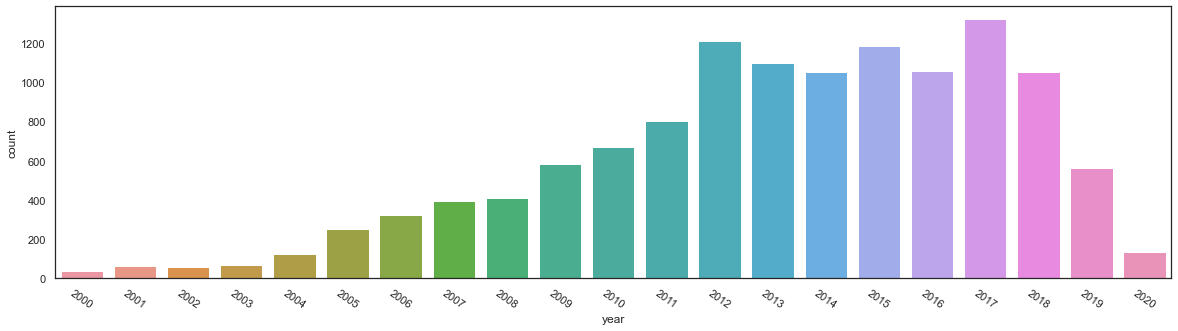

In [92]:
df_year = df1[(df1["year"]>1999) & (df1["year"]<2022)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

#### Comparing color by condition adrer 75% imbalancing

# 95% Imbalancing

In [94]:
rows2  = df1.sample(frac =.95)
rows2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
392,Maruti Wagon R LXI Minor,2007,95000,80000,Petrol,Individual,Manual,First Owner
546,Honda Brio V MT,2014,425000,29654,Petrol,Trustmark Dealer,Manual,First Owner
348,Chevrolet Beat Diesel PS,2012,159000,68000,Diesel,Dealer,Manual,First Owner
251,Maruti Baleno Alpha 1.2,2017,625000,52000,Petrol,Dealer,Manual,First Owner
1672,Ford Endeavour 4x4 XLT,2005,350000,150000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
2485,Maruti Alto K10 VXI AGS,2015,281000,4432,Petrol,Dealer,Automatic,Second Owner
1650,Chevrolet Optra Magnum 2.0 LS,2011,195000,120000,Diesel,Individual,Manual,First Owner
3483,Maruti Swift Dzire VDI,2013,250000,55000,Diesel,Individual,Manual,First Owner
2533,Hyundai EON Era Plus,2016,320000,24662,Petrol,Dealer,Manual,First Owner


In [95]:
df2 = pd.concat([df1, rows2])
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
2485,Maruti Alto K10 VXI AGS,2015,281000,4432,Petrol,Dealer,Automatic,Second Owner
1650,Chevrolet Optra Magnum 2.0 LS,2011,195000,120000,Diesel,Individual,Manual,First Owner
3483,Maruti Swift Dzire VDI,2013,250000,55000,Diesel,Individual,Manual,First Owner
2533,Hyundai EON Era Plus,2016,320000,24662,Petrol,Dealer,Manual,First Owner


In [96]:
df2.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

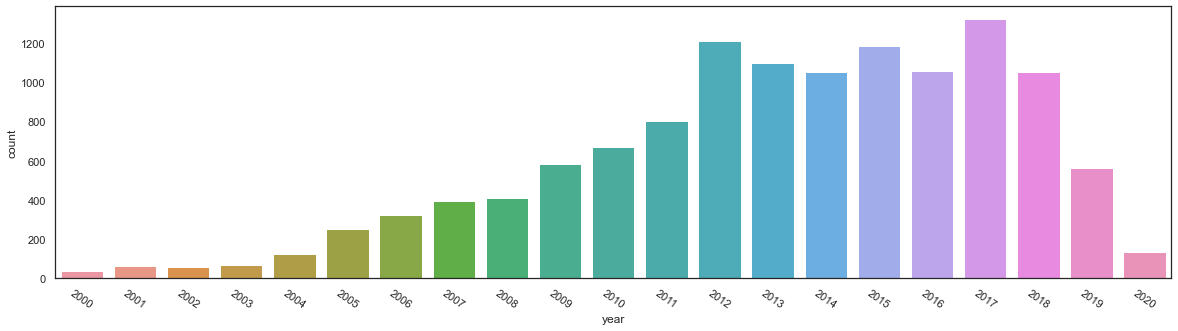

In [97]:
df_year = df1[(df1["year"]>1999) & (df1["year"]<2022)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()